In [1]:
from ALS.CP import solve_multiple_runways_cp,solve_single_runway_cp
from ALS.MIP import solve_multiple_runways_mip, solve_single_runway_mip
from ALS.utils import read_data
from ALS.performanceCP import performance_CP
from ALS.performanceMIP import performance_MIP
from ALS.visualization import visualize_solution
from ortools.sat.python import cp_model
import pandas as pd 

In [2]:
import ortools
print(ortools.__version__)


9.11.4210


In [3]:
filename = "data/airland2.txt"

num_planes, planes_data, separation_times = read_data(filename)

num_runways = 2

	       Reading data from airland2.txt

-> Number of planes: 15 



In [4]:
decision_strategies_multiple = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    },
    {
        "variables": "runway",
        "variable_strategy": cp_model.CHOOSE_FIRST,      
        "value_strategy": cp_model.SELECT_MAX_VALUE      
    }
]


solver, mem_before, mem_after = solve_multiple_runways_cp(num_planes, num_runways, planes_data, separation_times,
                            decision_strategies=decision_strategies_multiple, 
                            hint=True,  
                            search_strategy=cp_model.FIXED_SEARCH)
metrics_CP_multiple_runway = performance_CP(solver, planes_data, mem_before, mem_after)

		     Creating CP model

-> Number of decision variables created: 285
-> Number of constraints: 721

			Solving CP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 6: 128 | Target Time: 121 | Penalty: 210.0

		Performance Metrics for CP

-> Execution time (s): 0.05
-> Solution Status: OPTIMAL
-> Memory usage (MB): 19.14
-> Number of Conflicts: 0
-> Number of Branches: 482
-> Best objective bound: 210.0



		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 122 | Target Time: 120 | Penalty: 60.0
  -> Plane 6: 130 | Target Time: 121 | Penalty: 270.0
  -> Plane 7: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 8: 138 | Target Time: 128 | Penalty: 300.0
  -> Plane 10: 339 | Target Time: 341 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.86
-> Solution Status: OPTIMAL
-> Memory usage (MB): 13.22
-> Number of Conflicts: 0
-> Number of Branches: 854
-> Best objective bound: 1480.0



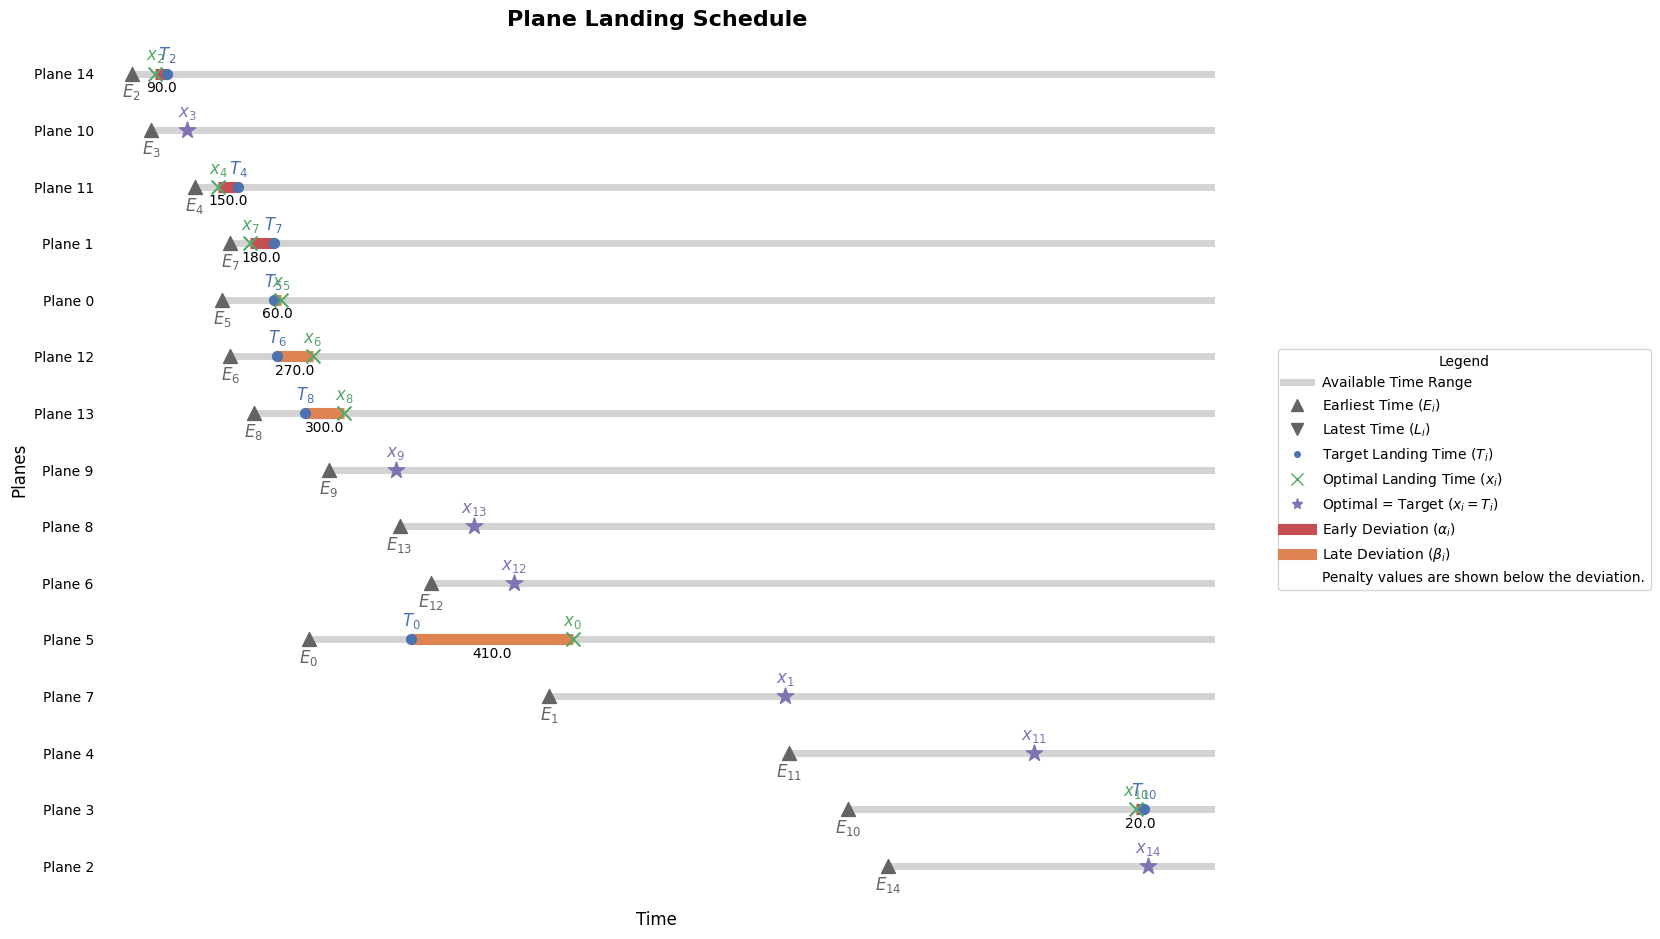

In [5]:
decision_strategies_single = [
    {
        "variables": "position",
        "variable_strategy": cp_model.CHOOSE_FIRST,        
        "value_strategy": cp_model.SELECT_MIN_VALUE      
    }
]

solver, variables,mem_before, mem_after = solve_single_runway_cp(num_planes, planes_data, separation_times, decision_strategies_single,
        hint=True, search_strategy=cp_model.FIXED_SEARCH)
metrics_CP_single_runway = performance_CP(solver, planes_data, mem_before, mem_after)

visualize_solution(solver, num_planes, planes_data, variables, approach="CP")

		     Creating CP model

-> Number of decision variables created: 165
-> Number of constraints: 511

			Solving CP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 114 | Target Time: 120 | Penalty: 180.0
  -> Plane 6: 122 | Target Time: 121 | Penalty: 30.0
  -> Plane 7: 138 | Target Time: 120 | Penalty: 540.0
  -> Plane 8: 130 | Target Time: 128 | Penalty: 60.0
  -> Plane 14: 344 | Target Time: 342 | Penalty: 20.0

		Performance Metrics for CP

-> Execution time (s): 0.21
-> Solution Status: OPTIMAL
-> Memory usage (MB): 0.64
-> Number of Conflicts: 0
-> Number of Branches: 0
-> Best objective bound: 1480.0



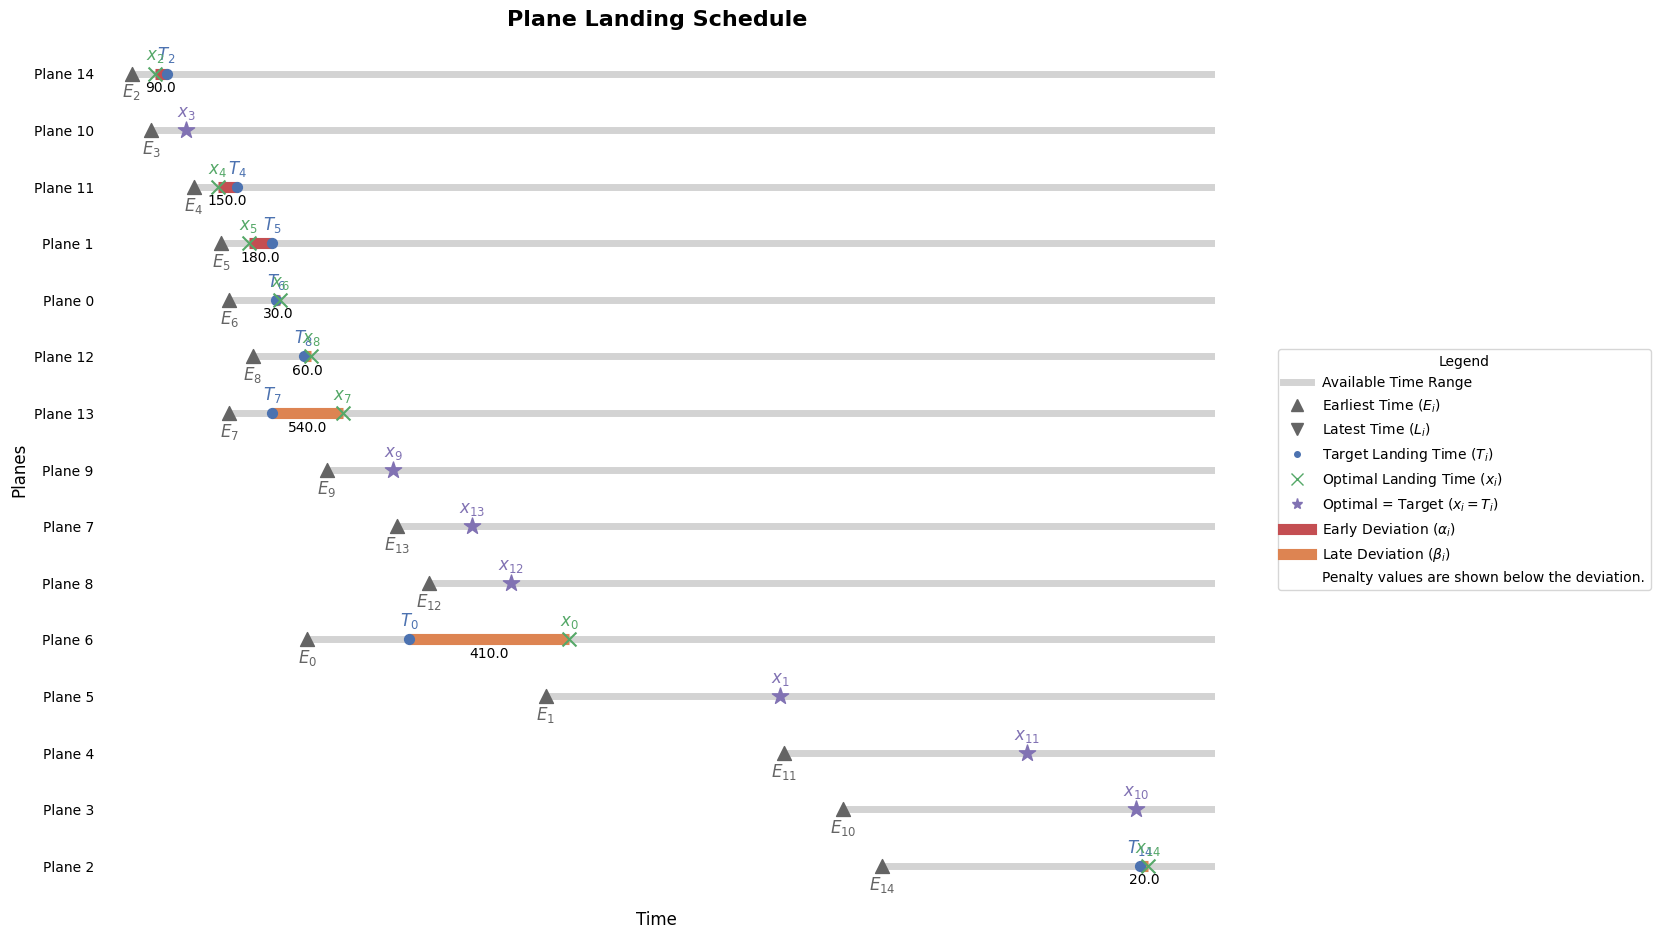

In [6]:
solver, variables, mem_before, mem_after = solve_single_runway_cp(num_planes, planes_data, separation_times, decision_strategies_single,hint=True)
metrics_CP_single_runway = performance_CP(solver, planes_data, mem_before, mem_after)

visualize_solution(solver, num_planes, planes_data, variables, approach="CP")

		    Creating MIP Solver

-> Number of decision variables created: 255
-> Number of constraints: 420

			Solving MIP

-> Optimal Cost: 1480.0

-> Planes that did not land on the target time:
  -> Plane 0: 196.0 | Target Time: 155 | Penalty: 410.0
  -> Plane 2: 90.0 | Target Time: 93 | Penalty: 90.0
  -> Plane 4: 106.0 | Target Time: 111 | Penalty: 150.0
  -> Plane 5: 138.0 | Target Time: 120 | Penalty: 540.0
  -> Plane 6: 122.0 | Target Time: 121 | Penalty: 30.0
  -> Plane 7: 114.0 | Target Time: 120 | Penalty: 180.0
  -> Plane 8: 130.0 | Target Time: 128 | Penalty: 60.0
  -> Plane 14: 344.0 | Target Time: 342 | Penalty: 20.0

		Performance Metrics for MIP

-> Execution time: 0.14 seconds
-> Number of variables in the model: 255
-> Number of constraints in the model: 420
-> Total penalty: 1480.0
-> Memory usage: 0.31 MB



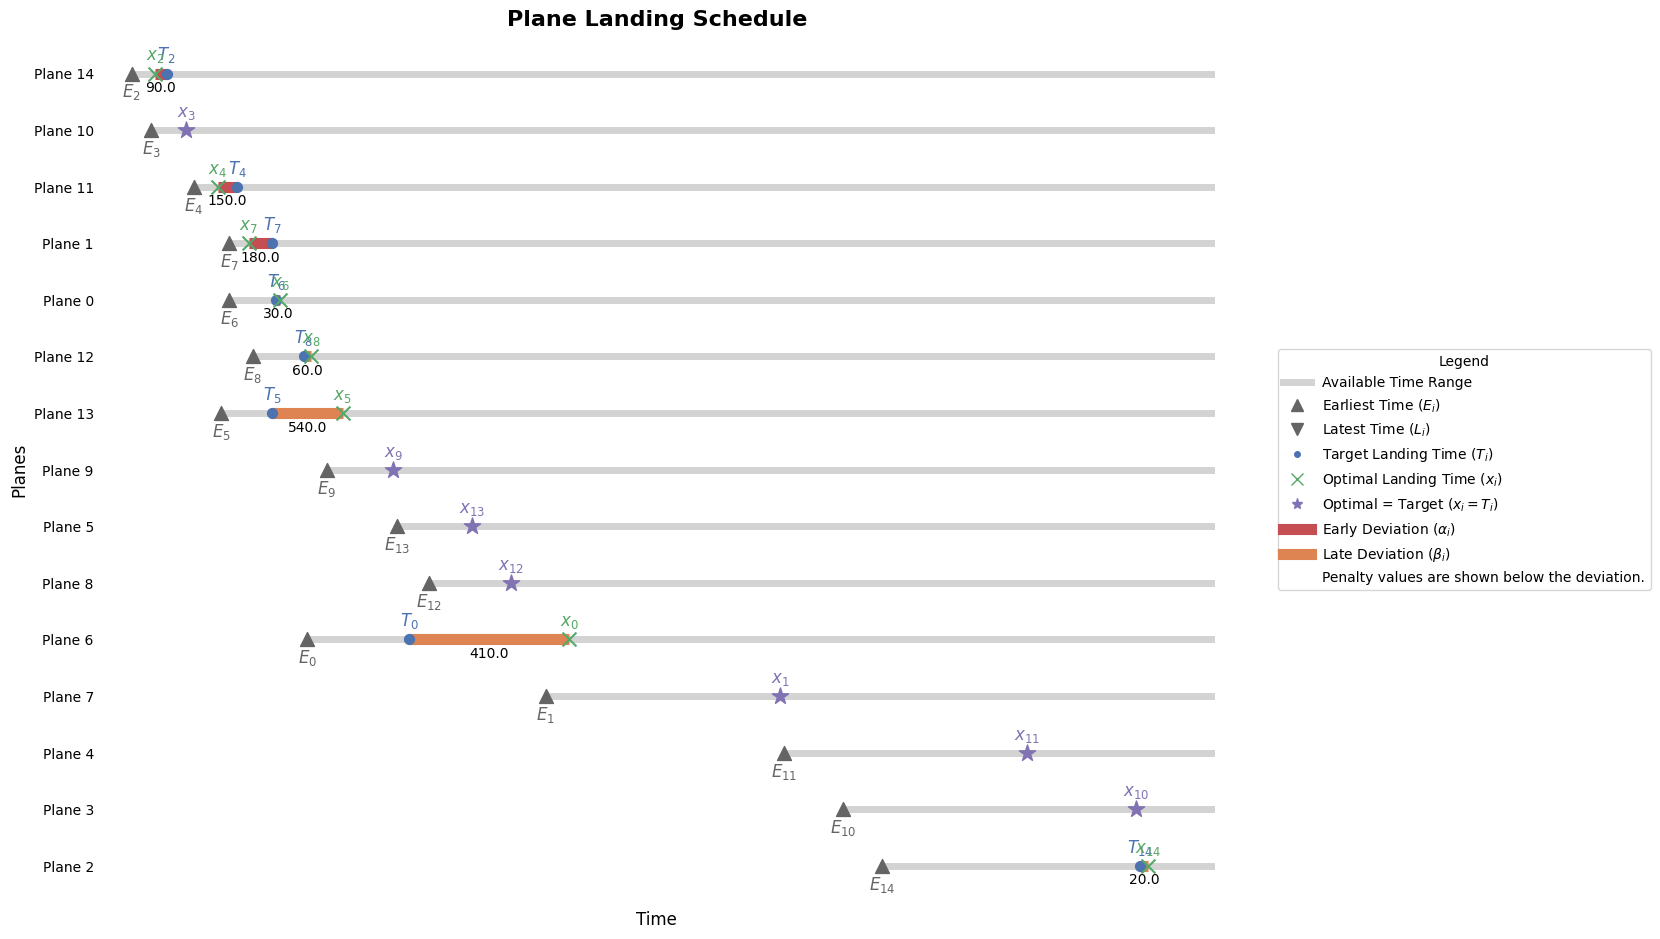

In [7]:
solver, variables, mem_before, mem_after = solve_single_runway_mip(num_planes, planes_data, separation_times)
metrics_MIP_single_runway = performance_MIP(solver, mem_before, mem_after)

visualize_solution(solver, num_planes, planes_data, variables, approach="MIP")

In [8]:
solver, memory_before, memory_after = solve_multiple_runways_mip(num_planes, num_runways, planes_data, separation_times)
metrics_MIP_multiple_runway = performance_MIP(solver, mem_before, mem_after)

		    Creating MIP Solver

-> Number of decision variables created: 495
-> Number of constraints: 750

			Solving MIP

-> Optimal Cost: 210.0

-> Planes that did not land on the target time:
  -> Plane 5: 113.0 | Target Time: 120 | Penalty: 210.0

		Performance Metrics for MIP

-> Execution time: 0.03 seconds
-> Number of variables in the model: 495
-> Number of constraints in the model: 750
-> Total penalty: 210.0
-> Memory usage: 0.31 MB



In [9]:
selected_variables = [
    "metrics_CP_single_runway",
    "metrics_CP_multiple_runway"
]

# Filtrar as variáveis selecionadas
variables = {var: globals()[var] for var in selected_variables}

# Criar o DataFrame
data = {
    "Model": list(variables.keys()),
    "Execution Time": [v[0] for v in variables.values()],
    "Status": [v[1] for v in variables.values()],
    "Memory Usage": [v[2] for v in variables.values()],
    "Number of Conflicts": [v[3] for v in variables.values()],
    "Number of Branches": [v[4] for v in variables.values()],
    "Best Objective Bound": [v[5] for v in variables.values()]
}

df = pd.DataFrame(data)

KeyError: 0

In [ ]:
df.head()